### About

This is a project I made for school. There are markdown cells explaining the goals and reasoning for certain decisions I made along the way. Skills used in this project includes **data cleaning**, **data analysis**, **machine learning**, and **feature selection**.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## 1. Introduction

### Research Goal Statement

**Primary Research Goal**: Build a predictive model that will effectively predict ``Used Price`` for new datasets\
**Secondary Research Goal**: Build a predictive model that yields reliable interpretative insights about the nature of the relationship between the variables in the dataset.

Our research will be considering the following five explanatory variables: ``Review Score``, ``All Play Styles Length``, ``Completionist Rushed Length``, ``Max Players``, ``Sales``



### Research Motivation

There are many factors that come into play regarding the price of used video games. By training a model, we can understand what variables matter the most for used price and predict the demand of video games outside of our dataset. This could be beneficial to video game consumers when considering future value of their purchase after they are finished with it. On the other hand, stores that resell video games, like GameStop, could use such model to determine what price they will sell a used game for or if it's not even worth buying. This research will help us predict the complex market for used videogames.

## 2. Dataset Discussion

### Dataset Display

In [27]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [28]:
df.shape

(1212, 36)

The original dataframe has 1212 rows.

## 3. Dataset Cleaning

To clean our data, let's first make sure that our dataframe is only comprised of our explanatory variables and response variable.

In [29]:
df = df[['Metrics.Review Score','Length.All PlayStyles.Average', 'Length.Completionists.Rushed', 'Features.Max Players', 'Metrics.Sales', 'Metrics.Used Price']]
df.head()

,Metrics.Review Score,Length.All PlayStyles.Average,Length.Completionists.Rushed,Features.Max Players,Metrics.Sales,Metrics.Used Price
0,85,22.716667,22.016667,1,4.69,24.95
1,89,10.100000,0.000000,1,0.56,14.95
2,81,4.566667,6.800000,2,0.54,22.95
3,81,0.000000,0.000000,1,0.49,12.95
4,61,13.250000,66.283333,1,0.45,14.95


It is also nice to rename our columns for interpretability purposes and to make future code easier.

In [30]:
df = df.rename(columns={"Metrics.Review Score": "Review_Score","Length.All PlayStyles.Average": "All_PlayStyles_Length","Length.Completionists.Rushed": "Completionists_Length","Features.Max Players": "Max_Players","Metrics.Sales": "Sales", "Metrics.Used Price": "Used_Price"})
df.head()

,Review_Score,All_PlayStyles_Length,Completionists_Length,Max_Players,Sales,Used_Price
0,85,22.716667,22.016667,1,4.69,24.95
1,89,10.100000,0.000000,1,0.56,14.95
2,81,4.566667,6.800000,2,0.54,22.95
3,81,0.000000,0.000000,1,0.49,12.95
4,61,13.250000,66.283333,1,0.45,14.95


Let's also make sure there are no explicit missing values in our dataframe.

In [31]:
df.isna().sum()

Review_Score             0
All_PlayStyles_Length    0
Completionists_Length    0
Max_Players              0
Sales                    0
Used_Price               0
dtype: int64

Finally, we will look at the distribution of each of our numerical variables to determine outliers we should remove from the dataframe. 

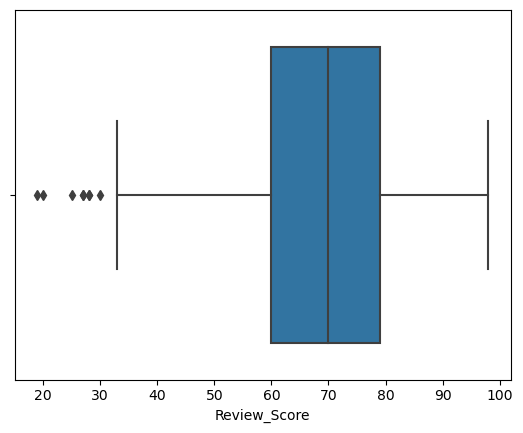

In [32]:
sns.boxplot(x = 'Review_Score', data = df)
plt.show()

In [33]:
df = df[df['Review_Score'] > 22]

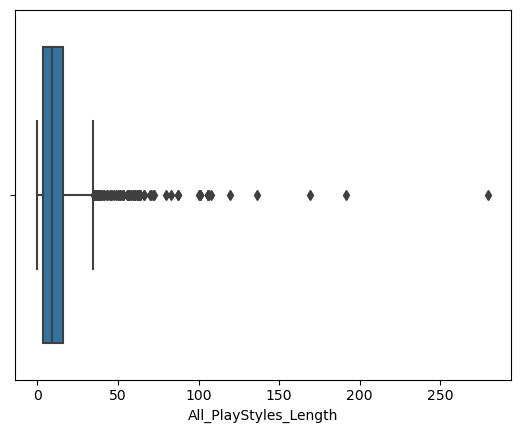

In [34]:
sns.boxplot(x = 'All_PlayStyles_Length', data = df)
plt.show()

In [35]:
df = df[ (df['All_PlayStyles_Length'] > 0) & (df['All_PlayStyles_Length'] < 250)]

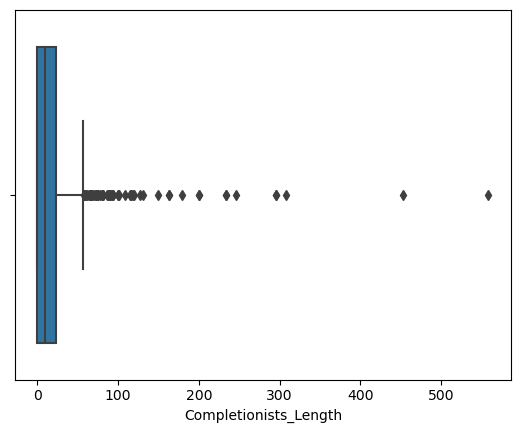

In [36]:
sns.boxplot(x = 'Completionists_Length', data = df)
plt.show()

In [37]:
df = df[(df['Completionists_Length'] > 0) & (df['Completionists_Length'] < 400)]

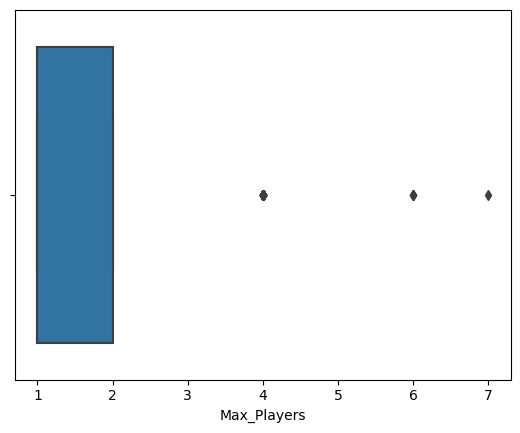

In [38]:
sns.boxplot(x = 'Max_Players', data = df)
plt.show()


In [39]:
df = df[df['Max_Players'] < 5]

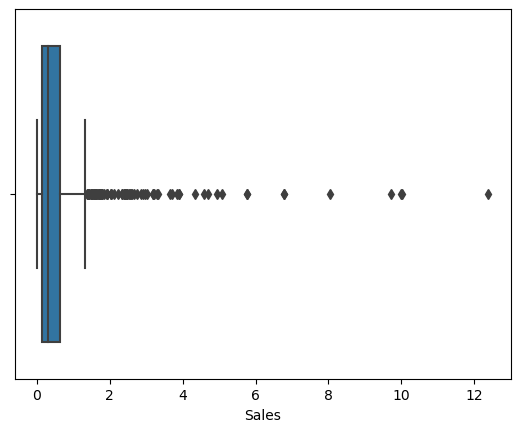

In [40]:
sns.boxplot(x = 'Sales', data = df)
plt.show()

In [41]:
df = df[(df['Sales'] > 0) & (df['Sales'] < 11)]

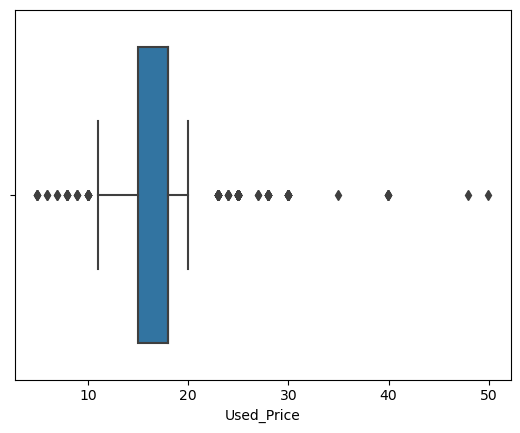

In [42]:
sns.boxplot(x = 'Used_Price', data = df)
plt.show()

In [43]:
df = df[df['Used_Price'] < 40]

In [44]:
df.shape

(658, 6)

After our data cleaning, we are left with 658 rows meaning we removed 554 rows. We removed outliers from the dataframe as well as some 0 values which did not make sense in context. For example, the length of time for all play styles to finish the game could not be at 0, that is impossible. It is important to note that the pro of dropping data is that our models be more representative of the rest of the data which makes for more efficiency. The con of dropping data is that our models will not be representative of the full dataset.

## 4. Preliminary Analysis

### Pairsplot

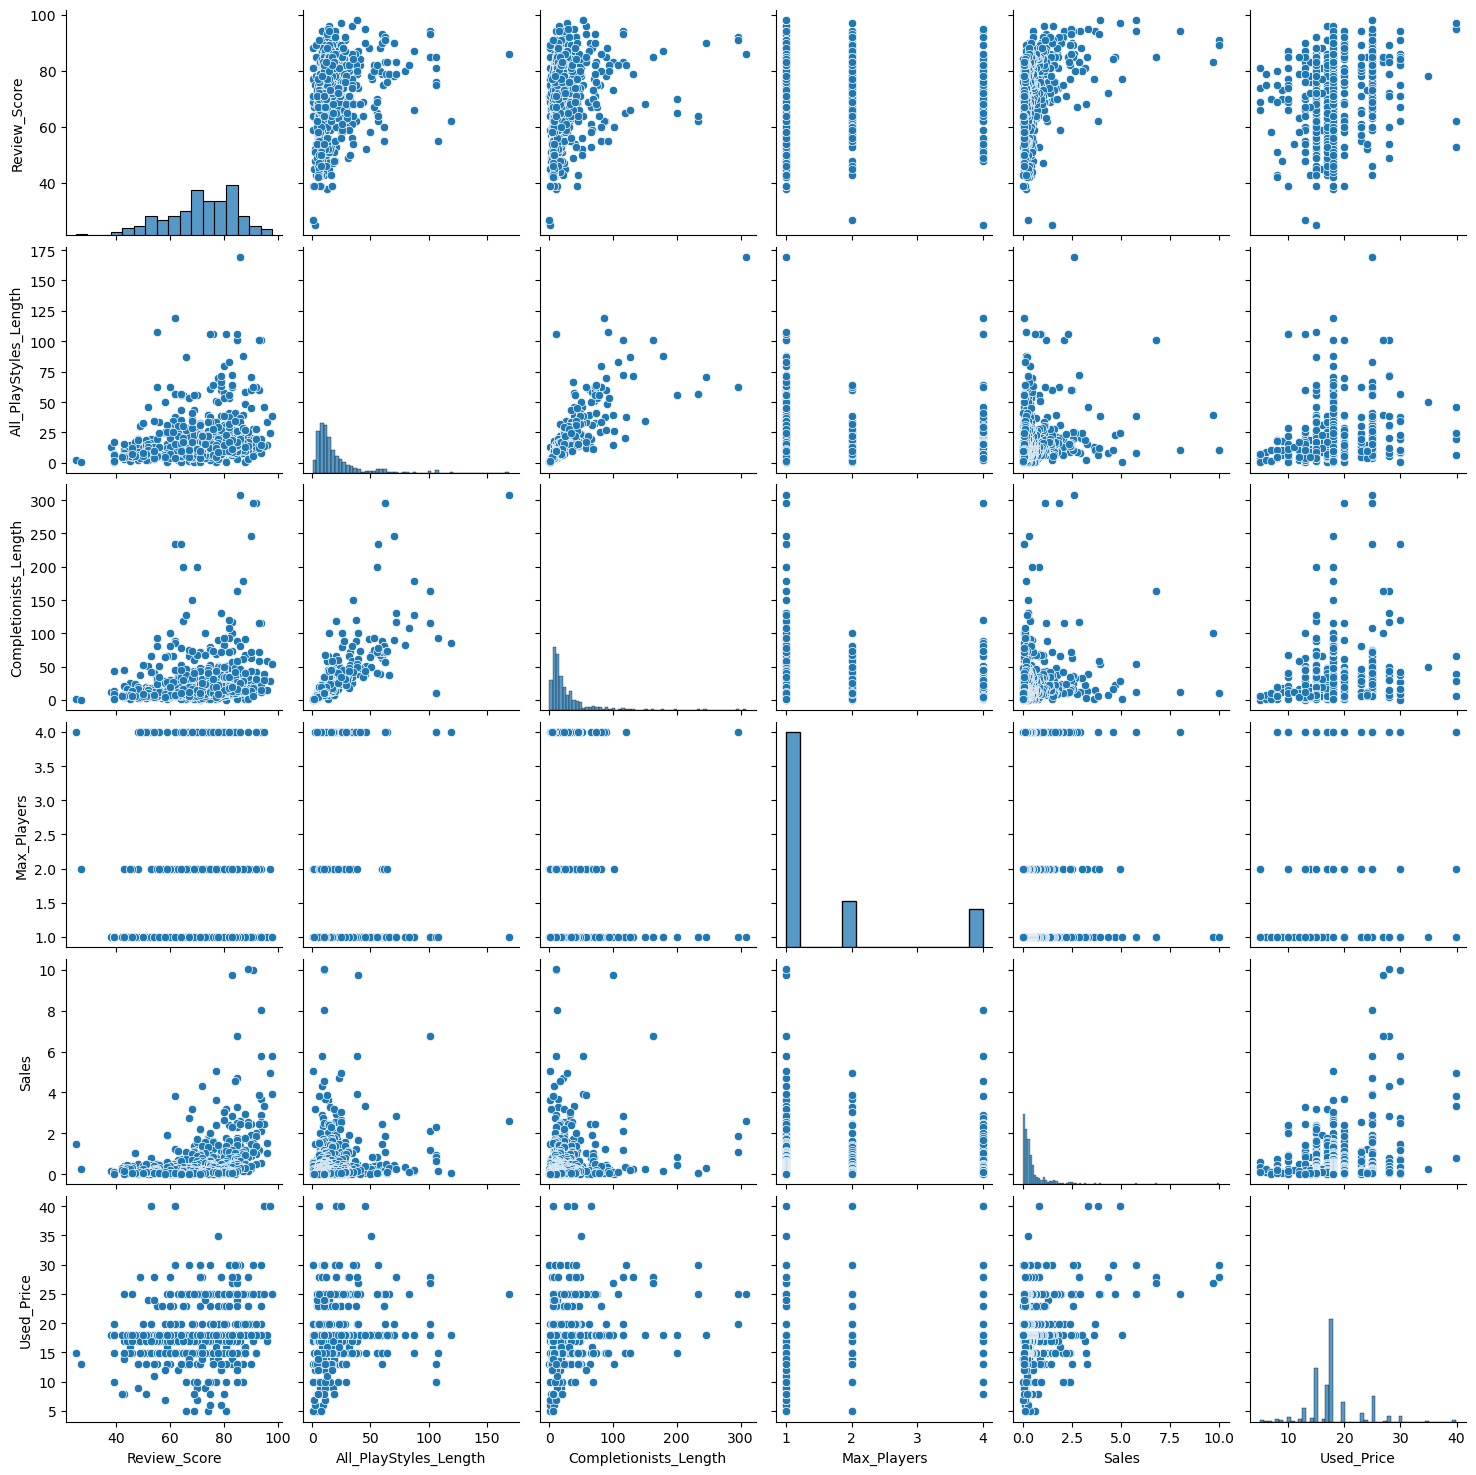

In [45]:
sns.pairplot(df)
plt.show()

### Fitted Values vs. Residuals Plot

In [46]:
full_model = smf.ols('Used_Price~Review_Score+All_PlayStyles_Length+Completionists_Length+Max_Players+Sales', data=df).fit()

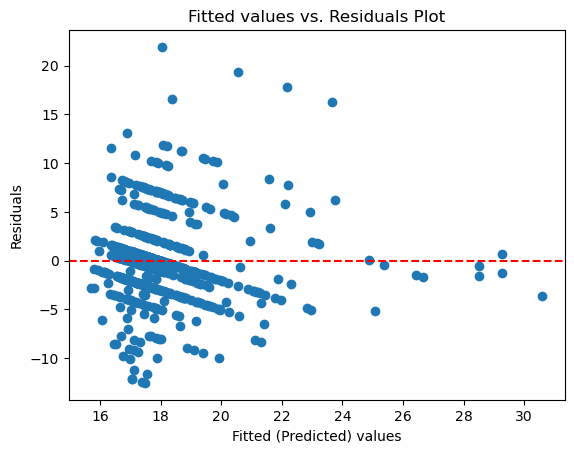

In [47]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

It seems that some of our explanatory variables such as ``Sales``, ``All Play Styles Length``, and ``Completionists Length`` lack a linear relationship with our response variable, ``Used Price`` based on the pair plots. Our Fitted Values vs. Residuals Plot has a pretty even distribution which is good, but transforming some of our explanatory variables may help even more with the linearity assumption.

In [48]:
df['Sales'] = np.log(df['Sales'])
df['All_PlayStyles_Length'] = np.sqrt(df['All_PlayStyles_Length'])
df['Completionists_Length'] = np.sqrt(df['Completionists_Length'])
df.head()

,Review_Score,All_PlayStyles_Length,Completionists_Length,Max_Players,Sales,Used_Price
0,85,4.766200,4.692192,1,1.545433,24.95
2,81,2.136976,2.607681,2,-0.616186,22.95
4,61,3.640055,8.141458,1,-0.798508,14.95
5,67,4.683304,5.480268,1,-0.891598,12.95
6,88,0.903696,1.118034,1,-1.021651,19.95


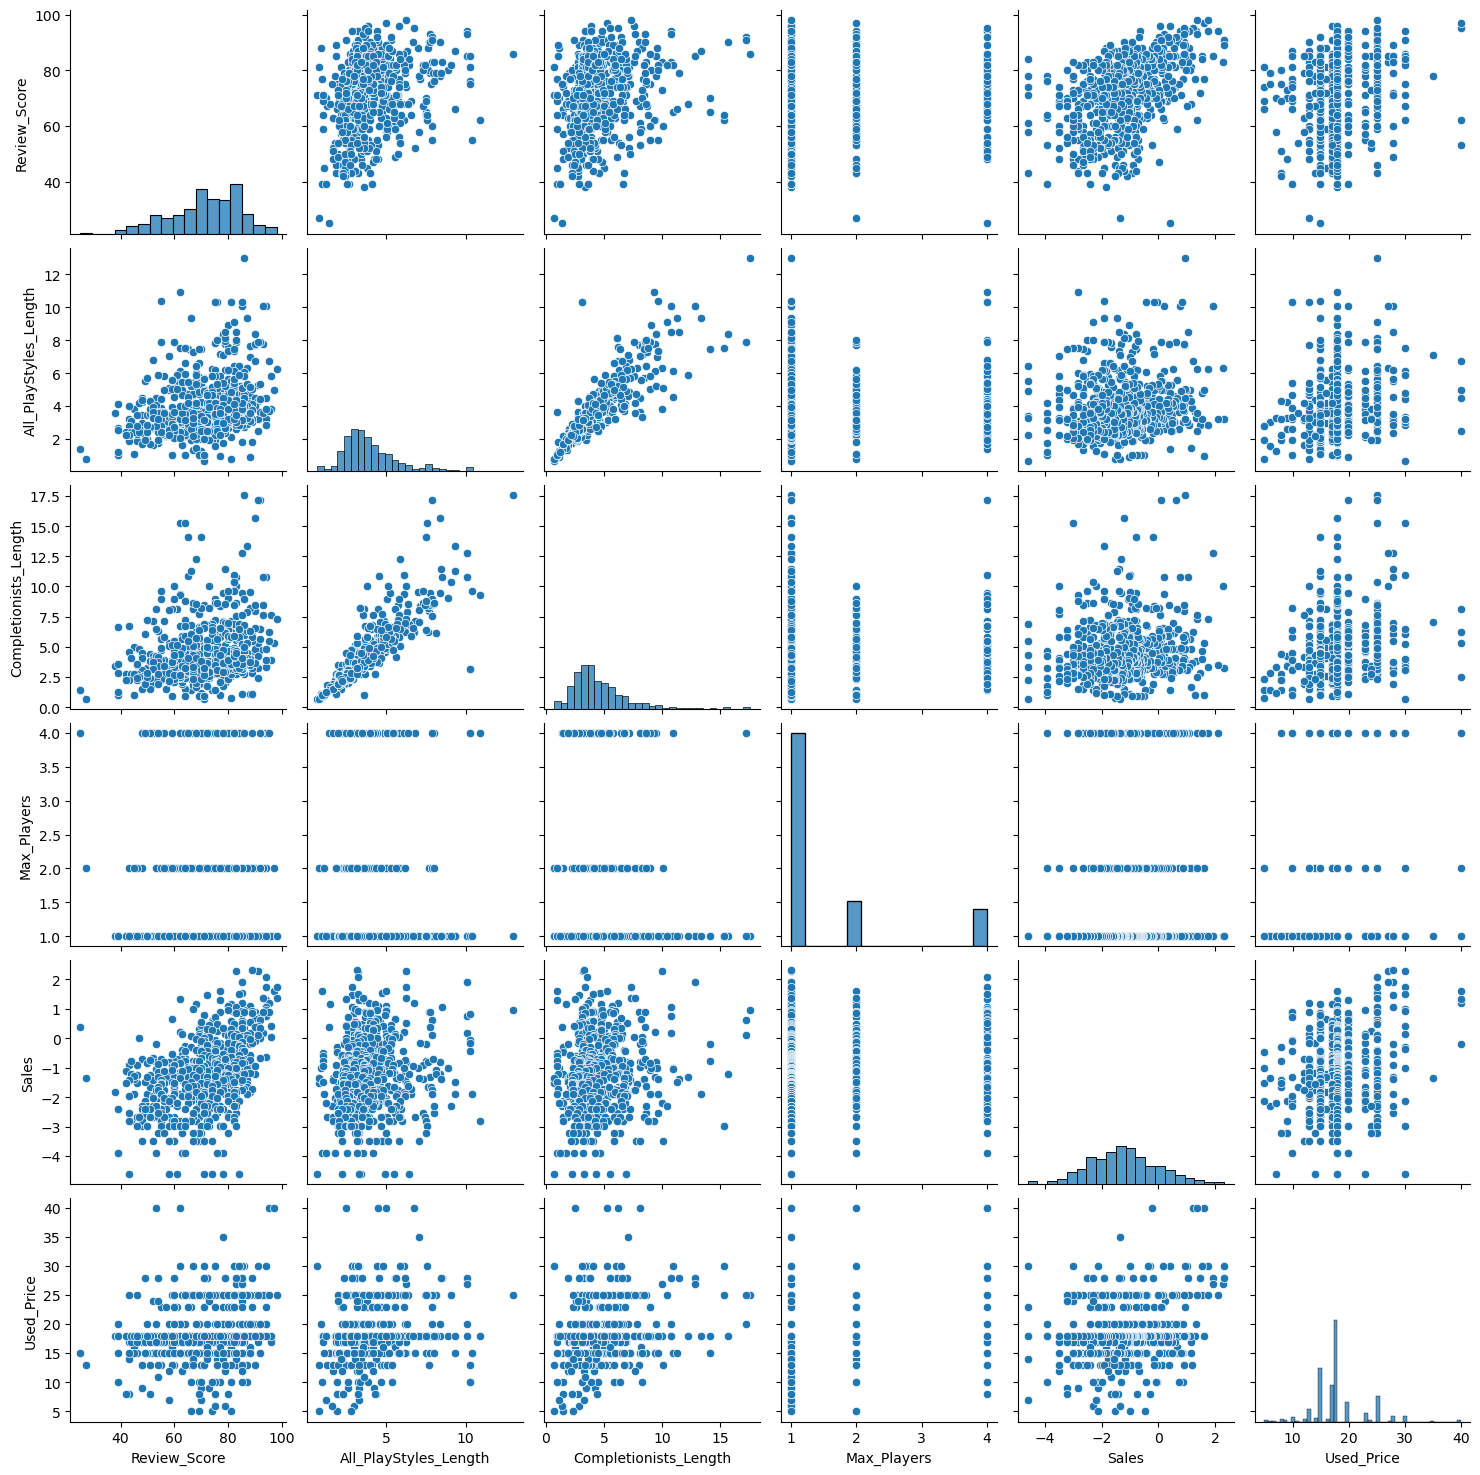

In [49]:
sns.pairplot(df)
plt.show()

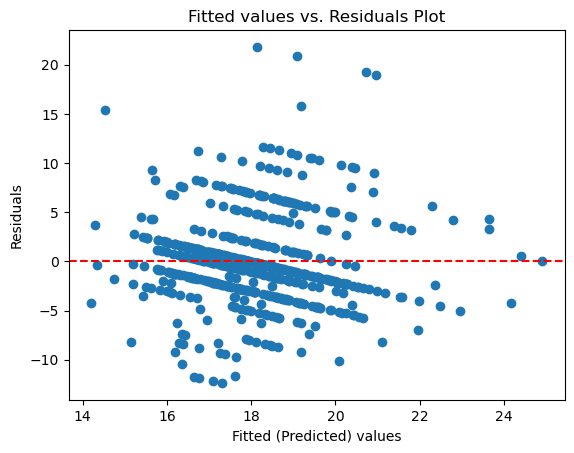

In [50]:
full_model = smf.ols('Used_Price~Review_Score+All_PlayStyles_Length+Completionists_Length+Max_Players+Sales', data=df).fit()
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

As we can see in the pairs plot after transformation, we squashed the larger input values and the relationships of ``Sales``, ``All Play Styles Length``, and ``Completionists Length`` with ``Used Price`` are now more linear. The Fitted values vs. Residuals Plot also shows an even distribution along segments of the x axis.

### Interaction Terms

Since there are no categorical variables in our model, there will be no need to include any interaction terms.

## 5. Predictive Models

### Train-Test Split

We will now split our cleaned dataframe into a training dataframe and a testing dataframe to build the model.

In [51]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=207)

In [52]:
y_train = df_train['Used_Price']
X_train = df_train.drop(['Used_Price'], axis=1)
y_test = df_test['Used_Price']
X_test = df_test.drop(['Used_Price'], axis=1)

### Scaling

We will scale our explanatory variables to have the magnitude of slopes be more interpretable in representing the importance they have to predicting the response variable.

In [53]:
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(X_train)
X_train = pd.DataFrame(scaled_expl_vars, columns=X_train.columns)
X_train.head()

,Review_Score,All_PlayStyles_Length,Completionists_Length,Max_Players,Sales
0,1.414063,2.047217,1.397088,0.430931,1.691788
1,-0.880663,-0.419894,-0.553486,-0.541901,-0.064223
2,-0.880663,0.288735,0.375490,-0.541901,0.266562
3,0.419682,1.729023,1.554407,-0.541901,0.853149
4,1.567045,0.198550,0.775715,2.376596,0.980458


In [54]:
scaled_expl_vars = scaler_training.transform(X_test)
X_test = pd.DataFrame(scaled_expl_vars, columns=X_test.columns)
X_test.head()

,Review_Score,All_PlayStyles_Length,Completionists_Length,Max_Players,Sales
0,-0.804172,1.010959,0.189403,0.430931,-0.850734
1,1.261081,-0.536516,-0.473518,-0.541901,1.420225
2,0.037227,-0.872280,-0.424500,-0.541901,-1.255234
3,-0.039263,-0.484548,-0.573683,-0.541901,-1.804106
4,0.266700,-0.676352,-0.522189,-0.541901,0.923582


### 5.1 Non-Regularized Linear Regression Full Model

In [55]:
current_model = smf.ols(formula='Used_Price~Review_Score+All_PlayStyles_Length+Completionists_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = current_model.predict(X_test)
current_model_R2 = r2_score(y_test,y_pred_test)
current_model_R2

-0.131339282166826

The non-regularized linear regression full model has a R2 score of -0.131.

### 5.2 Non-Regularized Linear Regression Full Model with Interaction Terms

There are no interaction terms as stated in section 4.

### 5.3 Feature Selection

We will use the backwards elimination algorithm to help us select a good combination of explanatory variables to include in the model.

In [56]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Completionists_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(0.06584612149959723, True)

In [57]:
test_model = smf.ols(formula='Used_Price~Review_Score+Completionists_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.14379110216667246, False)

In [58]:
test_model = smf.ols(formula='Used_Price~Review_Score+All_PlayStyles_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.10666880961960468, True)

In [59]:
test_model = smf.ols(formula='Used_Price~Review_Score+All_PlayStyles_Length+Completionists_Length+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.2351578352255117, False)

In [60]:
test_model = smf.ols(formula='Used_Price~Review_Score+All_PlayStyles_Length+Completionists_Length+Max_Players',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-1.0497338171797215, False)

Through the first iteration, the model without ``Review Score`` yielded the highest test R^2.

In [61]:
current_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Completionists_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = current_model.predict(X_test)
current_model_R2 = r2_score(y_test,y_pred_test)
current_model_R2

0.06584612149959723

In [62]:
test_model = smf.ols(formula='Used_Price~Completionists_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(0.07224417016273155, True)

In [63]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(0.08299236742773153, True)

In [64]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Completionists_Length+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(0.06238163603315794, False)

In [65]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Completionists_Length+Max_Players',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.06763190135639952, False)

Through the second iteration, the model without ``Review Score`` and ``Completionists Length`` yielded the highest test R^2.

In [66]:
current_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = current_model.predict(X_test)
current_model_R2 = r2_score(y_test,y_pred_test)
current_model_R2

0.08299236742773153

In [67]:
test_model = smf.ols(formula='Used_Price~Max_Players+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.21118446226835164, False)

In [68]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(0.08866574831925167, True)

In [69]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Max_Players',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.032113017874326744, False)

Through the third iteration, the model without ``Max Players``, ``Review Score``, and ``Completionists Length`` yielded the highest test R^2.

In [70]:
current_model = smf.ols(formula='Used_Price~All_PlayStyles_Length+Sales',
                      data=df_train).fit()
y_pred_test = current_model.predict(X_test)
current_model_R2 = r2_score(y_test,y_pred_test)
current_model_R2

0.08866574831925167

In [71]:
test_model = smf.ols(formula='Used_Price~All_PlayStyles_Length',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.05921910894394289, False)

In [72]:
test_model = smf.ols(formula='Used_Price~Sales',
                      data=df_train).fit()
y_pred_test = test_model.predict(X_test)
r2_score(y_test,y_pred_test), r2_score(y_test,y_pred_test) > current_model_R2

(-0.08271335925383472, False)

The model with only ``All Play Styles Length`` and ``Sales`` yielded the highest test R^2 through the backwards elimination algorithm.

In [73]:
best_model = current_model
y_pred_test = best_model.predict(X_test)
r2_score(y_test,y_pred_test)

0.08866574831925167

The test R^2 score for our final model is 0.0881

## 6. Best Model Discussion

### Equation

In [74]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Used_Price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     20.91
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.83e-09
Time:                        17:00:40   Log-Likelihood:                -1532.9
No. Observations:                 526   AIC:                             3072.
Df Residuals:                     523   BIC:                             3085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.1920      0.540     31.814      0.000      16.130      18.254
All_PlayStyles_Length     0.4622      0.110      4.218      0.000       0.247       0.677
Sales                     0.6758      0.156      4.342      0.000       0.370       0.982
==============================================================================
Omnibus:                       80.440   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.687
Skew:                           0.779   Prob(JB):                     9.71e-45
Kurtosis:                       5.612   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The equation for our best model is:\
Used Price^= 17.1920\
\+ 0.4622 * All_PlayStyles_Length\
\+ 0.6758 * Sales

### Test Dataset Fit

With a test R^2 score of 0.0881 in our best model, it seems that it is overall not the greatest fit for the test dataset. This R^2 score is fairly low and does not suggest very good predictive power.

### Overfitting Explanatory Variables

The fact that the model with only ``All Play Styles Length`` and ``Sales`` was our best model indicates that ``Max Players``, ``Review Score``, and ``Completionists Length`` were overfitting the full model.

### Multicollinearity

In [75]:
df_train[['All_PlayStyles_Length','Sales']].corr()

,All_PlayStyles_Length,Sales
All_PlayStyles_Length,1.000000,0.123927
Sales,0.123927,1.000000


The remaining explanatory variables have a low correlation meaning that there is not multicollinearity within our best model.

### Slope Interpretations

Since we scaled our explanatory variables, the slopes from our best model equation help us know how important each of our explanatory variables are to predict ``Owned Price``. ``Sales`` is the most important based on the slope magnitudes which makes sense in context because more sales usually indicates there is a higher demand for the video game which drives price up.

## 7. Conclusion

### Reccomendation

I would very slightly reccomend the best model found from this research to someone like buyers and sellers that would like to predict the used price of a video game. I think it could give a decent rough estimate to someone looking to use it, but they may need to seek other information to better determine used price. It could be interesting to see the results the model returns when given new explanatory variables and how well it performs. However, the performance the model had on our test data set shows that it is not reliable. 

### Shortcomings/Caveats

The first shortcoming is that we are unsure that the chosen best model will yield the highest R^2 values out of the many possible models that could have been created with this dataset. The backwards elimination algorithm we used tries to find the model with the highest possible R^2 but is not guaranteed to do so. Also, we could have used other explanatory variables from the original dataset that may have been a better fit for a model predicting Used Price. A second caveat is that we did not try to use a regularization model such as LASSO or ridge regression which could have outperformed a non-regularized linear regression model. Finally, dropping outliers does have it's cons as stated during the dataset cleaning and our models and statistics did not represent the full original dataset.

### Future Work

Based on what I have observed in my analysis, I would like to move foward in trying to find the best method to predict used price of video games. It would be interesting to take on the previously noted caveats and try different types of explanatory variables, types of models, and cleaning techniques. Finally, I would like to test this model and future models on new datasets to see how well it would perform outside of the dataset we analyzed here.